<a href="https://colab.research.google.com/github/jigglyjonny/Tensorflow-Projects/blob/main/covid_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from tqdm import tqdm
import imageio as iio
import cv2 as cv
import pickle
from natsort import natsorted
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data and saving them in pickle files

We import the data from 

- covid (mri images and masks)

and save them in a pickle file

In [3]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/COVID/images')
sorted_covid_data_ = os.listdir()
sorted_covid_data_ = sorted(sorted_covid_data_, key=lambda x: int(x[6:-4]))


In [ ]:
covid_image_data_ = [] # list
for i in tqdm(sorted_covid_data_):
    img = iio.imread(i)
    img = cv.resize(img, (256, 256))
    img = np.array(img).tolist()
    covid_image_data_.append(img)
covid_image_data_ = np.asarray(covid_image_data_)

100%|██████████| 3616/3616 [01:30<00:00, 40.07it/s] 

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/COVID/masks')
sorted_covid_masks_ = os.listdir()
sorted_covid_masks_ = sorted(sorted_covid_masks_, key=lambda x: int(x[6:-4]))

In [ ]:
covid_mask_data_ = [] # list
for i in tqdm(sorted_covid_masks_):
    img = iio.imread(i)
    img = np.array(img)
    covid_mask_data_.append((img[:,:,0]).tolist())
covid_mask_data_ = np.asarray(covid_mask_data_)

In [ ]:
covid_mask_data_.shape

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

In [ ]:
a = (covid_image_data_, covid_mask_data_)
with open('covid_image_and_mask_.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)



We import the data from 

- normal (mri images and masks)

and save them in a pickle file



In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/Normal/images')
sorted_normal_data_ = os.listdir()
sorted_normal_data_ = sorted(sorted_normal_data_, key=lambda x: int(x[7:-4]))
print(sorted_normal_data_)

['Normal-1.png', 'Normal-2.png', 'Normal-3.png', 'Normal-4.png', 'Normal-5.png', 'Normal-6.png', 'Normal-7.png', 'Normal-8.png', 'Normal-9.png', 'Normal-10.png', 'Normal-11.png', 'Normal-12.png', 'Normal-13.png', 'Normal-14.png', 'Normal-15.png', 'Normal-16.png', 'Normal-17.png', 'Normal-18.png', 'Normal-19.png', 'Normal-20.png', 'Normal-21.png', 'Normal-22.png', 'Normal-23.png', 'Normal-24.png', 'Normal-25.png', 'Normal-26.png', 'Normal-27.png', 'Normal-28.png', 'Normal-29.png', 'Normal-30.png', 'Normal-31.png', 'Normal-32.png', 'Normal-33.png', 'Normal-34.png', 'Normal-35.png', 'Normal-36.png', 'Normal-37.png', 'Normal-38.png', 'Normal-39.png', 'Normal-40.png', 'Normal-41.png', 'Normal-42.png', 'Normal-43.png', 'Normal-44.png', 'Normal-45.png', 'Normal-46.png', 'Normal-47.png', 'Normal-48.png', 'Normal-49.png', 'Normal-50.png', 'Normal-51.png', 'Normal-52.png', 'Normal-53.png', 'Normal-54.png', 'Normal-55.png', 'Normal-56.png', 'Normal-57.png', 'Normal-58.png', 'Normal-59.png', 'Norm

In [ ]:
normal_image_data_ = [] # list
for i in tqdm(sorted_normal_data_[0:3616]):
    img = iio.imread(i)
    img = cv.resize(img, (256, 256))
    img = np.array(img).tolist()
    normal_image_data_.append(img)
normal_image_data_ = np.asarray(normal_image_data_)

100%|██████████| 3616/3616 [38:58<00:00,  1.55it/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks')
sorted_normal_masks_ = os.listdir()
sorted_normal_masks_ = sorted(sorted_normal_masks_, key=lambda x: int(x[7:-4]))
print(sorted_normal_masks_)

['Normal-1.png', 'Normal-2.png', 'Normal-3.png', 'Normal-4.png', 'Normal-5.png', 'Normal-6.png', 'Normal-7.png', 'Normal-8.png', 'Normal-9.png', 'Normal-10.png', 'Normal-11.png', 'Normal-12.png', 'Normal-13.png', 'Normal-14.png', 'Normal-15.png', 'Normal-16.png', 'Normal-17.png', 'Normal-18.png', 'Normal-19.png', 'Normal-20.png', 'Normal-21.png', 'Normal-22.png', 'Normal-23.png', 'Normal-24.png', 'Normal-25.png', 'Normal-26.png', 'Normal-27.png', 'Normal-28.png', 'Normal-29.png', 'Normal-30.png', 'Normal-31.png', 'Normal-32.png', 'Normal-33.png', 'Normal-34.png', 'Normal-35.png', 'Normal-36.png', 'Normal-37.png', 'Normal-38.png', 'Normal-39.png', 'Normal-40.png', 'Normal-41.png', 'Normal-42.png', 'Normal-43.png', 'Normal-44.png', 'Normal-45.png', 'Normal-46.png', 'Normal-47.png', 'Normal-48.png', 'Normal-49.png', 'Normal-50.png', 'Normal-51.png', 'Normal-52.png', 'Normal-53.png', 'Normal-54.png', 'Normal-55.png', 'Normal-56.png', 'Normal-57.png', 'Normal-58.png', 'Normal-59.png', 'Norm

In [ ]:
normal_mask_data_ = [] # list
for i in tqdm(sorted_normal_masks_[0:3616]):
    img = iio.imread(i)
    img = np.array(img)
    normal_mask_data_.append((img[:,:,0]).tolist())
normal_mask_data_ = np.asarray(normal_mask_data_)

100%|██████████| 3616/3616 [40:11<00:00,  1.50it/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl']

In [ ]:
b = (normal_image_data_, normal_mask_data_)
with open('normal_image_and_mask_.pkl', 'wb') as handle:
    pickle.dump(b, handle, protocol=pickle.HIGHEST_PROTOCOL)


We import the data from 

- pneumonia (mri images and masks)

and save them in a pickle file


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/Viral Pneumonia/images')
sorted_pneumonia_data_ = os.listdir()
sorted_pneumonia_data_ = sorted(sorted_pneumonia_data_, key=lambda x: int(x[16:-4]))
print(sorted_pneumonia_data_)

['Viral Pneumonia-1.png', 'Viral Pneumonia-2.png', 'Viral Pneumonia-3.png', 'Viral Pneumonia-4.png', 'Viral Pneumonia-5.png', 'Viral Pneumonia-6.png', 'Viral Pneumonia-7.png', 'Viral Pneumonia-8.png', 'Viral Pneumonia-9.png', 'Viral Pneumonia-10.png', 'Viral Pneumonia-11.png', 'Viral Pneumonia-12.png', 'Viral Pneumonia-13.png', 'Viral Pneumonia-14.png', 'Viral Pneumonia-15.png', 'Viral Pneumonia-16.png', 'Viral Pneumonia-17.png', 'Viral Pneumonia-18.png', 'Viral Pneumonia-19.png', 'Viral Pneumonia-20.png', 'Viral Pneumonia-21.png', 'Viral Pneumonia-22.png', 'Viral Pneumonia-23.png', 'Viral Pneumonia-24.png', 'Viral Pneumonia-25.png', 'Viral Pneumonia-26.png', 'Viral Pneumonia-27.png', 'Viral Pneumonia-28.png', 'Viral Pneumonia-29.png', 'Viral Pneumonia-30.png', 'Viral Pneumonia-31.png', 'Viral Pneumonia-32.png', 'Viral Pneumonia-33.png', 'Viral Pneumonia-34.png', 'Viral Pneumonia-35.png', 'Viral Pneumonia-36.png', 'Viral Pneumonia-37.png', 'Viral Pneumonia-38.png', 'Viral Pneumonia-39.

In [ ]:
pneumonia_image_data_ = [] # list
for i in tqdm(sorted_pneumonia_data_):
    img = iio.imread(i)
    img = cv.resize(img, (256, 256))
    if len(img.shape) > 2:
        img = img[:,:,0]
        img = np.asarray(img).tolist()
    else:
        img = np.asarray(img).tolist()
    pneumonia_image_data_.append(img)
pneumonia_image_data_ = np.asarray(pneumonia_image_data_)

100%|██████████| 1345/1345 [14:11<00:00,  1.58it/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data/covid19_radiography/COVID-19_Radiography_Dataset/Viral Pneumonia/masks')
sorted_pneumonia_masks_ = os.listdir()
sorted_pneumonia_masks_ = sorted(sorted_pneumonia_masks_, key=lambda x: int(x[16:-4]))
print(sorted_pneumonia_masks_)

['Viral Pneumonia-1.png', 'Viral Pneumonia-2.png', 'Viral Pneumonia-3.png', 'Viral Pneumonia-4.png', 'Viral Pneumonia-5.png', 'Viral Pneumonia-6.png', 'Viral Pneumonia-7.png', 'Viral Pneumonia-8.png', 'Viral Pneumonia-9.png', 'Viral Pneumonia-10.png', 'Viral Pneumonia-11.png', 'Viral Pneumonia-12.png', 'Viral Pneumonia-13.png', 'Viral Pneumonia-14.png', 'Viral Pneumonia-15.png', 'Viral Pneumonia-16.png', 'Viral Pneumonia-17.png', 'Viral Pneumonia-18.png', 'Viral Pneumonia-19.png', 'Viral Pneumonia-20.png', 'Viral Pneumonia-21.png', 'Viral Pneumonia-22.png', 'Viral Pneumonia-23.png', 'Viral Pneumonia-24.png', 'Viral Pneumonia-25.png', 'Viral Pneumonia-26.png', 'Viral Pneumonia-27.png', 'Viral Pneumonia-28.png', 'Viral Pneumonia-29.png', 'Viral Pneumonia-30.png', 'Viral Pneumonia-31.png', 'Viral Pneumonia-32.png', 'Viral Pneumonia-33.png', 'Viral Pneumonia-34.png', 'Viral Pneumonia-35.png', 'Viral Pneumonia-36.png', 'Viral Pneumonia-37.png', 'Viral Pneumonia-38.png', 'Viral Pneumonia-39.

In [ ]:
pneumonia_mask_data_ = [] # list
for i in tqdm(sorted_pneumonia_masks_):
    img = iio.imread(i)
    img = np.array(img)
    pneumonia_mask_data_.append((img[:,:,0]).tolist())
pneumonia_mask_data_ = np.asarray(pneumonia_mask_data_)

100%|██████████| 1345/1345 [14:00<00:00,  1.60it/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl']

In [ ]:
c = (pneumonia_image_data_, pneumonia_mask_data_)
with open('pneumonia_image_and_mask_.pkl', 'wb') as handle:
    pickle.dump(c, handle, protocol=pickle.HIGHEST_PROTOCOL)

# We integrate the mri images with the mask images

Then we create 3 more pickle files of the cropped images of each data
- covid
- normal
- pneumonia

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl',
 'cropped_normal_images.pkl']

In [ ]:
with open('covid_image_and_mask_.pkl', 'rb') as handle:
    covid_images_and_masks = pickle.load(handle)

In [ ]:
with open('normal_image_and_mask_.pkl', 'rb') as handle:
    normal_images_and_masks = pickle.load(handle)

In [ ]:
with open('pneumonia_image_and_mask_.pkl', 'rb') as handle:
    pneumonia_images_and_masks = pickle.load(handle)

COVID CROPPING

In [ ]:
cropped_covid_images_ = []
for i in tqdm(range(len(covid_images_and_masks[0]))):
  cropped_covid_images_.append(covid_images_and_masks[0][i]*covid_images_and_masks[1][i])
cropped_covid_images_ = np.asarray(cropped_covid_images_)

100%|██████████| 3616/3616 [00:00<00:00, 4718.65it/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl']

In [ ]:
a = cropped_covid_images_
with open('cropped_covid_images.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl']

NORMAL CROPPING

In [ ]:
cropped_normal_images_ = []
for i in tqdm(range(len(normal_images_and_masks[0]))):
  cropped_normal_images_.append(normal_images_and_masks[0][i]*normal_images_and_masks[1][i])
cropped_normal_images_ = np.asarray(cropped_normal_images_)

100%|██████████| 3616/3616 [00:00<00:00, 4468.01it/s]


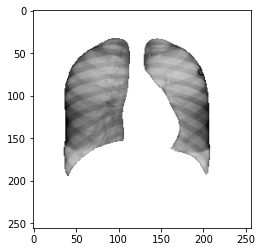

In [ ]:
plt.imshow(cropped_normal_images_[0], cmap='binary')

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl']

In [ ]:
a = cropped_normal_images_
with open('cropped_normal_images.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl',
 'cropped_normal_images.pkl']

PNEUMONIA CROPPING

In [ ]:
cropped_pneumonia_images_ = []
for i in tqdm(range(len(pneumonia_images_and_masks[0]))):
  cropped_pneumonia_images_.append(pneumonia_images_and_masks[0][i]*pneumonia_images_and_masks[1][i])
cropped_pneumonia_images_ = np.asarray(cropped_pneumonia_images_)

100%|██████████| 1345/1345 [00:00<00:00, 4863.65it/s]


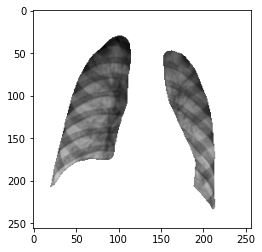

In [ ]:
plt.imshow(cropped_pneumonia_images_[0], cmap='binary')

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl',
 'cropped_normal_images.pkl']

In [ ]:
a = cropped_pneumonia_images_
with open('cropped_pneumonia_images.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl',
 'cropped_normal_images.pkl',
 'cropped_pneumonia_images.pkl']

# Shuffling data and setting variables
- covid = 0
- normal = 1
- pneumonia = 2

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'covid_image_and_mask_.pkl',
 'normal_image_and_mask_.pkl',
 'pneumonia_image_and_mask_.pkl',
 'cropped_covid_images.pkl',
 'cropped_normal_images.pkl',
 'cropped_pneumonia_images.pkl']

In [ ]:
with open('cropped_covid_images.pkl', 'rb') as handle:
    cropped_covid_stuff_ = pickle.load(handle)

In [ ]:
with open('cropped_normal_images.pkl', 'rb') as handle:
    cropped_normal_stuff_ = pickle.load(handle)

In [ ]:
with open('cropped_pneumonia_images.pkl', 'rb') as handle:
    cropped_pneumonia_stuff_ = pickle.load(handle)

In [ ]:
all_IMAGES = []
for i in tqdm(range(len(cropped_covid_stuff_))):
  all_IMAGES.append([cropped_covid_stuff_[i], 0])
for i in tqdm(range(len(cropped_normal_stuff_))):
  all_IMAGES.append([cropped_normal_stuff_[i], 1])
for i in tqdm(range(len(cropped_pneumonia_stuff_))):
  all_IMAGES.append([cropped_pneumonia_stuff_[i], 2])

100%|██████████| 1345/1345 [00:00<00:00, 793772.18it/s]


In [ ]:
random.shuffle(all_IMAGES)

In [ ]:
with open('all_Everything.pkl', 'wb') as handle:
    pickle.dump(all_IMAGES, handle, protocol=pickle.HIGHEST_PROTOCOL)

# More processing

In [9]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'all_Everything.pkl',
 'all_IMAGES.pkl',
 'OHE_test_labels.pkl',
 'covid_classification_model_.h5']

In [10]:
with open('all_Everything.pkl', 'rb') as handle:
    all_IMAGES = pickle.load(handle)

In [11]:
all_LABELS = []
for i in range(len(all_IMAGES)):
  all_LABELS.append(all_IMAGES[i][1])
  del all_IMAGES[i][1]

In [12]:
all_IMAGES = np.asarray(all_IMAGES)
all_LABELS = np.asarray(all_LABELS)

In [13]:
all_IMAGES = all_IMAGES[:, 0, :, :]

In [14]:
print(all_IMAGES.shape, all_LABELS.shape)

(8577, 256, 256) (8577,)


In [15]:
test_data = all_IMAGES[len(all_IMAGES)//2+1:len(all_IMAGES)]
test_labels = all_LABELS[len(all_LABELS)//2+1:len(all_LABELS)]
train_data = all_IMAGES[0:len(all_IMAGES)//2]
train_labels = all_LABELS[0:len(all_LABELS)//2]

In [16]:
test_everything = (test_data, test_labels)
train_everything = (train_data, train_labels)

In [17]:
with open('test_everything.pkl', 'wb') as handle:
    pickle.dump(test_everything, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('train_everything.pkl', 'wb') as handle:
    pickle.dump(train_everything, handle, protocol=pickle.HIGHEST_PROTOCOL)

# One hot encode and Tensorflow model

In [6]:
os.chdir('/content/drive/MyDrive/Jonathan/data')
os.listdir()

['covid19-radiography.zip',
 'covid19_radiography',
 '.ipynb_checkpoints',
 'train_everything.pkl',
 'all_Everything.pkl',
 'all_IMAGES.pkl',
 'test_everything.pkl',
 'OHE_test_labels.pkl',
 'covid_classification_model_.h5']

In [7]:
with open('test_everything.pkl', 'rb') as handle:
    test_everything = pickle.load(handle)

KeyboardInterrupt: ignored

In [8]:
with open('train_everything.pkl', 'rb') as handle:
    train_everything = pickle.load(handle)

EOFError: ignored

In [ ]:
test_data = test_everything[0]
train_data = train_everything[0]

In [ ]:
testLabelsohe = tf.keras.utils.to_categorical(test_everything[1])

In [ ]:
trainingLabelsohe = tf.keras.utils.to_categorical(train_everything[1])

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(256),
tf.keras.layers.Dense(256),
tf.keras.layers.Dense(256),
tf.keras.layers.Dense(256),
tf.keras.layers.Dense(128),
tf.keras.layers.Dense(128),
tf.keras.layers.Dense(128),
tf.keras.layers.Dense(64),
tf.keras.layers.Dense(32),
tf.keras.layers.Dense(16),
tf.keras.layers.Dense(3, activation = "softmax")
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
os.chdir('/content/drive/MyDrive/Jonathan/data')

In [ ]:
callbacks = [ tf.keras.callbacks.ModelCheckpoint("covid_classification_model_.h5", save_best_only=True) ]

In [ ]:
history = model.fit(
    train_data, trainingLabelsohe, 
    validation_data = (test_data, testLabelsohe),
    batch_size = 1,
    epochs = 1000,
    callbacks = callbacks
)

Epoch 1/1000
4288/4288 [==============================] - 651s 152ms/step - loss: 134097.6250 - accuracy: 0.5093 - val_loss: 89442.0078 - val_accuracy: 0.3022
Epoch 2/1000
4288/4288 [==============================] - 582s 136ms/step - loss: 5061834.5000 - accuracy: 0.5152 - val_loss: 27261.4258 - val_accuracy: 0.4583
Epoch 3/1000
4288/4288 [==============================] - 564s 132ms/step - loss: 14005.9316 - accuracy: 0.5254 - val_loss: 4060.1736 - val_accuracy: 0.5047
Epoch 4/1000
4288/4288 [==============================] - 597s 139ms/step - loss: 210766.4375 - accuracy: 0.5431 - val_loss: 1364.2904 - val_accuracy: 0.5289
Epoch 5/1000
4288/4288 [==============================] - 585s 136ms/step - loss: 946375.0625 - accuracy: 0.5385 - val_loss: 17862.6875 - val_accuracy: 0.4639
Epoch 6/1000
4288/4288 [==============================] - 581s 135ms/step - loss: 7030.3491 - accuracy: 0.5532 - val_loss: 2199.8096 - val_accuracy: 0.6000
Epoch 7/1000
4288/4288 [===========================